# "Functions Description"
> "Going through some functions and classes that will be extensively used in blog"
- toc: true
- branch: master
- badges: true
- comments: true
- permalink: /first-post/
- categories: [d2l, deeplearning, jupyter]

## 1. Axulliary Functions and Classes

### 1.1 Plotting Functions

In [205]:
# hide
from matplotlib import pyplot as plt
from typing import Union, Tuple, List
from IPython import display
import numpy as np

%matplotlib inline

Below is the main plotting function, which is creates or uses existing axes to plot multiple functions. Optionally we apply scaling and limits x and y values. 

From the functions point of view there is nothing really interesting going on. I provided key comments below in most places. We create two auxilliary functions - `set_axes` and `set_global_graph_params`. 

<ul>
    <li>`set_axes` sets labels, limits and scale for the x and y axis.</li>
    <li>`set_global_graph_params` sets figure size and adjusts background color to dark_background</li>
</ul>

In [211]:
# collapse
def set_axes(axes: plt.Axes, xlabel: str, ylabel: str, 
             xlim: Union[int, float], ylim: Union[int, float],
             xscale: str, yscale: str, legend: List[str]) -> plt.Axes:
    """
    Customizes the provided axes according to the provided parameters
    """
    # set labels
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    
    # must be used before setting `xlim` and `ylim` to avoid distorting the graph
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    
    # set limits
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    
    # add legend
    if legend is not None: axes.legend(legend)
    
    # add square grid
    axes.grid()
    
    return axes


def set_global_graph_params(figsize: Tuple[float, float] = (3.5, 2.5),
                            darkmode: bool = False):
    """
    Use plt parameters to set the figure size and background style.
    
    For more details please refer to:
    https://matplotlib.org/3.5.0/tutorials/introductory/customizing.html#customizing-with-dynamic-rc-settings
    """
    # set size of the figure
    plt.rcParams['figure.figsize'] = figsize
    
    display.set_matplotlib_formats('png')
    # use if dark background is enables
    if darkmode: plt.style.use("dark_background") 

`plot` is the main plotting function that takes list or array of X values, corresponding list of Y values (functions on X) and plots those functions on a graph using different predetermined styles.

The code snippet below checks if X and Y have one axis (either a list or array with one dimension). If this condition is true, than it creates lists for both X and Y in order to be able to compare the their respective length. This is usefull when Y is an array of several functions over X $ (f(x), \space f^{'}(x)) $. Then X will be repeated twice for both functions.

```python
if has_one_axis(X):
    X = [X]  
if Y is None:
    X, Y = [[]]*len(X), X
elif has_one_axis(Y):
    Y = [Y]
    
```

In [212]:
# collapse
def plot(X: Union[list, torch.Tensor], Y:Union[list, torch.Tensor] = None, 
         xlabel: str = None, ylabel: str = None, legend: List[str] = None, xlim: Union[int, float] = None, 
         ylim: Union[int, float] = None, xscale: str = 'linear', yscale: str = 'linear',
         fmts: Tuple[str] = ('-', 'm--', 'g-.', 'r:'), 
         figsize: Tuple[float, float] = (3.5, 2.5), axes: plt.Axes = None, darkmode: bool =  False):
    """
    Main plotting function that takes `X` as an array and Y as a list of tensors (functions on `X`).
    Optionally applies scaling and limits on x and y axis
    """
    
    set_global_graph_params(figsize, darkmode)
    axes = axes if axes else plt.gca()
    
    def has_one_axis(X):
        """
        Check if X is a 1-d list of 1-d tensor / array
        """
        return (hasattr(X, "ndim") and X.ndim == 1) or \
        (isinstance(X, list) and (not hasattr(X[0], "__len__")))
    
    if has_one_axis(X):
        X = [X]  # for the step below when we repeat X the len(y) times. Without it list will just increase in size
    if Y is None:
        X, Y = [[]]*len(X), X #  convenience to run the loop below (zip). Basically defaults to `axes.plot(y, fmt)`
    elif has_one_axis(Y):
        Y = [Y]
    
    # adjust `X` for the length of `Y` by repeating `X` len(`Y`) times
    if len(X) != len(Y):
        X = X * len(Y)
        
    if axes is None: axes = plt.gca()
    plt.cla()
    
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
            
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

#### Examples

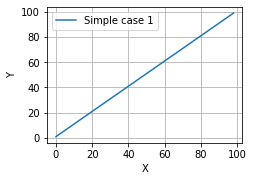

In [208]:
X = list(range(1, 100, 1))
plot(X=X, xlabel="X", ylabel="Y", legend=["Simple case 1"]);

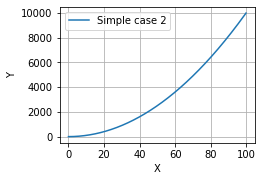

In [209]:
X = np.arange(0, 100, 0.1)
plot(X=X, Y=[x**2 for x in X], xlabel="X", ylabel="Y", legend=["Simple case 2"]);

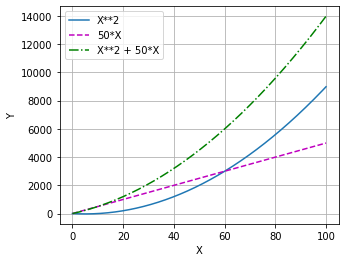

In [210]:
X = np.arange(0, 100, 0.1)
Y1 = X**2 - 10*X
Y2 = 50*X
Y3 =  Y1 + Y2
plot(X=X, Y=[Y1, Y2, Y3], xlabel="X", ylabel="Y", legend=["X**2", "50*X", "X**2 + 50*X"], figsize=[5, 4]);

### 1.2 Timer

In [263]:
# hide
import time

In [278]:
# collapse
class Timer:
    """Record multiple running times"""
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        """Start the timer."""
        self.tik = time.time()
    
    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]
    
    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)
    
    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

### Examples

As a simple example we create two torch tensors of length 10 000 and add them up in in a loop. We can use `Timer` to measure how long it takes for the code to run. At the same time please note that using jupyter magic command `%%timeit` is more reliable due to the following reasons:
<ul>
    <li> `Timer` relies only on a single calculation and thus is sensitive to other processes that may be running in the OS at the current moment. %%timeit at the same time averages its calculation thus reducing the influence of parallel processes / tasks</li>
    <li>`%%timeit disables the garbage collector to minimize influence of a collection run at during code timing.</li>
</ul>

In [289]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [298]:
timer = Timer()
timer.start()
c = []
for i in range(len(b)):
    c.append(a[i] + b[i])
print(f'{timer.stop():.5f} sec')

0.15946 sec


In [299]:
%%timeit
c = []
for i in range(len(b)):
    c.append(a[i] + b[i])

39.1 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 1.3 Auxilliary functions

`synthetic_data` is used to create simple linear layer

In [346]:
def synthetic_data(w: torch.Tensor, b: Union[torch.Tensor, float], num_examples: int) -> torch.Tensor:
    """Generate y = Xw + b + noise, where y.shape is (num_examples, 1)"""
    X = torch.normal(mean=0, std=1, size=(num_examples,len(w)))  # create X from normal distrubtion 
    y = X@w + b  # Calculate y by using matrix multiplication `@`
    y += torch.normal(mean=0, std=0.01, size=y.shape)
    # if `w` is a 1-dimensional tensor, than y will be also a 1-dimensional tensor with shape [num_examples]
    # we reshape `y` to be of shape [num_examples,1]
    return X, y.reshape(-1,1)

In [369]:
def linreg(X: torch.Tensor, w: torch.Tensor, b: Union[torch.Tensor, float]) -> torch.Tensor:
    assert X.shape[-1] == w.shape[0], f'Got incorrect shapes for matrix multiplication. X.shape: {X.shape} and w.shape: {w.shape}'
    return X@w + b

### Examples

In [371]:
w = torch.tensor([2, -3.4])
b = 4.2
features, labels = synthetic_data(w, b, 1000)
features.shape, labels.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [ ]:
X = torch.normal(0, 1, size=(5,2))
w = torch.tensor([2, -3.4])
b = 4.2